In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image_path = '../output_videos/cropped_img.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

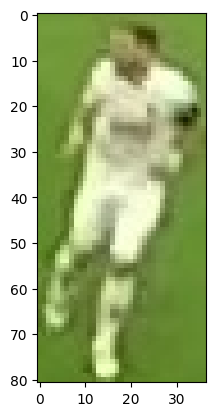

In [3]:
plt.imshow(image)

## Take the top half of the image for t-shirt color

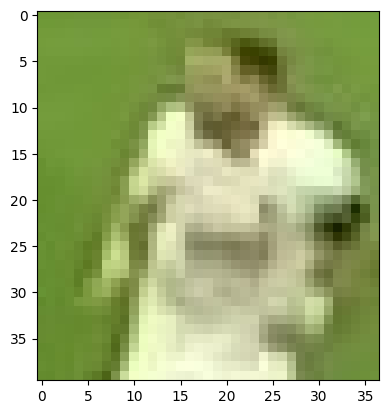

In [4]:
top_half_img = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_img)

## Segment T-Shirt by clustering into background and t-shirt

In [8]:
image_2d = top_half_img.reshape(-1,3)

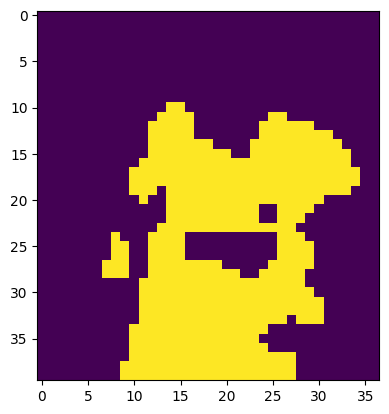

In [9]:
from sklearn.cluster import KMeans

#kmeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

#get the cluster labels
labels = kmeans.labels_

#reshape the labels into original image shape
clustered_image = labels.reshape(top_half_img.shape[0], top_half_img.shape[1])

plt.imshow(clustered_image)

In [10]:
corner_clusters = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1,0], clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

0


In [11]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

1


In [12]:
kmeans.cluster_centers_[player_cluster]

array([210.40495868, 215.6446281 , 171.95041322])